In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform, euclidean

In [2]:
# read in the pairwise TM-score dataframe
TM_PATH = '/Users/wyssuser/UniRep_Homology/Data/SCOP1.37/DataFrames/minimum_PDB_IDs_and_TMScores.csv'
TM_df = pd.read_csv(TM_PATH)
TM_df

,File_1,File_2,TM Score 1,TM Score 2
0,1poh,1apm,0.38573,0.13372
1,1mol,1abr,0.33643,0.25742
2,1tys,1gln,0.22608,0.31684
3,1tab,3pte,0.33089,0.05897
4,1mjc,1prn,0.35730,0.11476
...,...,...,...,...
207020,1gky,1lyl,0.23545,0.28215
207021,1php,2drp,0.04839,0.45508
207022,1hpl,2bbv,0.37967,0.19292
207023,1kal,2ms2,0.23367,0.12475


In [3]:
# read in minimal unirep vector df 
UNIREP_PATH = '/Users/wyssuser/UniRep_Homology/Data/SCOP1.37/DataFrames/minimum_PDB_IDs_and_vectors.csv'
UniRep_df = pd.read_csv(UNIREP_PATH)
UniRep_df

,PDB_ID,0,1,2,3,4,5,6,7,8,...,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,3sdh,0.004692,-0.005701,0.061197,-0.046022,0.069603,0.035202,0.034677,-0.017636,-0.008411,...,0.024981,0.074629,-0.174588,0.049572,-0.204189,0.056928,0.242702,0.007475,0.056497,-0.016382
1,1bab,0.007161,-0.014262,0.060963,-0.020105,0.132701,0.026557,-0.022438,-0.019747,-0.008731,...,0.033194,0.116029,-0.095365,0.025884,-0.135499,-0.106537,0.143019,0.009387,0.080786,-0.014602
2,1flp,0.008357,0.019439,0.087585,-0.038732,-0.224356,-0.020750,0.038047,-0.013677,-0.007871,...,-0.002585,0.070704,-0.073958,0.037784,-0.188846,-0.107744,0.218012,0.013417,0.046307,0.055833
3,2lhb,0.006021,-0.011122,0.059768,-0.017780,-0.028888,0.018183,-0.026957,-0.016296,-0.008319,...,0.032374,0.080957,-0.167045,0.039463,-0.130889,-0.066095,0.195868,0.008242,0.082603,-0.017537
4,1ith,0.006741,-0.001078,0.045836,-0.036665,0.096136,0.031397,-0.049740,-0.013767,-0.009023,...,0.022224,0.189440,-0.210996,0.029516,-0.169887,-0.015854,0.219971,0.005995,0.074090,0.012798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1bnb,0.017419,-0.165455,0.032845,0.015392,-0.332864,0.024352,-0.370705,0.011418,-0.019946,...,0.003412,-0.047409,-0.046805,0.010849,0.036937,0.035867,0.043674,0.012417,0.345262,0.023532
451,1bds,0.015591,-0.099563,0.016665,0.013133,-0.222952,0.041339,-0.426415,0.000879,-0.017755,...,0.017569,0.111729,-0.142406,0.020565,-0.100009,0.012061,0.060497,0.065259,0.079155,0.027596
452,1ans,0.022698,-0.060281,0.001081,0.022960,-0.322739,0.032005,-0.432283,0.014592,-0.026941,...,0.057720,0.092702,-0.074752,0.026331,-0.063782,0.023556,0.034996,0.035549,0.537149,0.134298
453,1ldl,0.012973,-0.325531,0.030185,0.011983,-0.390483,0.034453,-0.231789,0.063779,-0.016972,...,-0.036919,-0.052118,-0.015417,0.010296,-0.213079,0.027085,-0.011476,-0.013122,0.654411,0.036436


- Aim is to calculate pairwise euclidean distances between vectors and then plot against tm score

In [8]:
# step 1 : make a list of the unirep vectors stored as numpy arrays

vector_list=[]

for v in range(len(UniRep_df)):
    vector_list.append(UniRep_df.iloc[v,1:].to_numpy())
    
vector_list

[array([0.0046916287, -0.0057006674, 0.06119736, ..., 0.0074748937,
        0.05649734, -0.01638239], dtype=object),
 array([0.0071607954, -0.014261969, 0.060963485, ..., 0.009386877,
        0.08078552, -0.014602181], dtype=object),
 array([0.00835662, 0.019438671, 0.08758548, ..., 0.013417331000000001,
        0.046306923, 0.055833198], dtype=object),
 array([0.006021092, -0.011121629, 0.05976765, ..., 0.008241797,
        0.08260305, -0.017536856], dtype=object),
 array([0.006741300699999999, -0.0010781183, 0.045835555, ..., 0.005994535,
        0.0740897, 0.012797556000000002], dtype=object),
 array([0.006695943, -0.0017719804000000002, 0.05153432, ...,
        0.035533327999999996, 0.042366907, -0.016184866000000003],
       dtype=object),
 array([0.00935897, 0.044935986, 0.06756288, ..., 0.002788792,
        -0.053906392000000004, 0.013562541000000001], dtype=object),
 array([0.011676118999999999, -0.016054211000000002, 0.032802287, ...,
        0.007850979000000001, 0.032178503,

In [9]:
len(vector_list)  # sanity check

455

In [12]:
# step 2 : make a nested for loop calculating the euclidean distances between each array, pairwise

dist_list = []

for i in range(len(UniRep_df)):
    for j in range(len(UniRep_df)):
        dist_list.append(euclidean(vector_list[i],vector_list[j]))
        
dist_list  # nb the first number in a list will have been calculated in the previous set

[0.0,
 2.2835020967864517,
 3.417253907365964,
 2.0074825639519873,
 1.798197929645357,
 1.8896731553436683,
 2.4382981177047554,
 2.466597919145908,
 4.701600052363157,
 5.153258492212329,
 2.688188028187577,
 2.4231976375920627,
 2.6263246924759405,
 3.830748767842499,
 4.620395362131793,
 2.9772437417216606,
 2.601036251113751,
 2.798006012112546,
 4.00113155195256,
 4.69710774026865,
 3.3811353469491356,
 2.546995831648456,
 2.9619470348165335,
 2.5356823156554755,
 2.616961461626198,
 2.2684282030004708,
 3.1238433518396347,
 2.1920204719371594,
 2.543739606841251,
 2.5144884261151828,
 3.2523359892477997,
 3.0589144824684644,
 2.6118430880667423,
 2.641844448785049,
 3.5540734633100035,
 4.468896193817882,
 4.361774607843192,
 4.97327736177397,
 3.7823650386263905,
 3.800465160537168,
 5.825748470830825,
 5.277396089722004,
 2.5725168673152075,
 6.82665430011176,
 5.340172523442167,
 7.236611075726215,
 7.3534199292781235,
 7.0458099790410325,
 4.244592410236975,
 2.8111273455320

In [13]:
len(dist_list)  # sanity check

207025

In [14]:
# step 3: generate two lists which will be the protein pair identity of each pairwise euclidean distance 
First_ID_list = []
Second_ID_list = []
for f1 in range(len(UniRep_df)):
    for f2 in range(len(UniRep_df)):
        First_ID_list.append(UniRep_df.iloc[f1,0])
        Second_ID_list.append(UniRep_df.iloc[f2,0])

In [50]:
# step 4 : make the dataframe
euc_df = pd.DataFrame()
euc_df['File_1'] = First_ID_list
euc_df['File_2'] = Second_ID_list
euc_df['Euclidean Distance'] = dist_list
euc_df

,File_1,File_2,Euclidean Distance
0,3sdh,3sdh,0.000000
1,3sdh,1bab,2.283502
2,3sdh,1flp,3.417254
3,3sdh,2lhb,2.007483
4,3sdh,1ith,1.798198
...,...,...,...
207020,1ldr,1bnb,2.969208
207021,1ldr,1bds,3.552604
207022,1ldr,1ans,4.367738
207023,1ldr,1ldl,1.771271


In [57]:
# step 5: order the tm score dataframe and the unirep vector dataframe by protein identity.
sorted_eucs = euc_df.sort_values(by =['File_1','File_2'])
sorted_tms = TM_df.sort_values(by =['File_1','File_2'])

In [58]:
sorted_eucs

,File_1,File_2,Euclidean Distance
145920,119l,119l,0.000000
145613,119l,1aab,3.820197
146036,119l,1aaf,5.326700
145838,119l,1aba,5.269361
145752,119l,1abr,3.816168
...,...,...,...
123351,7icd,5cyt,7.037370
123690,7icd,5fbp,5.110014
123524,7icd,5rub,2.182981
123736,7icd,5znf,5.941117


In [59]:
sorted_tms

,File_1,File_2,TM Score 1,TM Score 2
151843,119l,119l,1.00000,1.00000
162444,119l,1aab,0.21867,0.36817
88831,119l,1aaf,0.11954,0.23254
24561,119l,1aba,0.21126,0.31531
163856,119l,1abr,0.26187,0.28770
...,...,...,...,...
166969,7icd,5cyt,0.14674,0.36637
124452,7icd,5fbp,0.21710,0.26388
95776,7icd,5rub,0.26862,0.32895
3675,7icd,5znf,0.05267,0.45144


In [44]:
# step 6: calculate 1/euclidean distance for downstream plotting
 # first need to convert all 0s to 1 in the euclidean data and then 
sorted_eucs = sorted_eucs.replace(0.0,1.0)
 # secondly find the reciprocal 
recip_euc = 1/sorted_eucs.loc[:,'Euclidean Distance']
recip_euc

145920    1.000000
145613    0.261767
146036    0.187734
145838    0.189776
145752    0.262043
            ...   
123351    0.142099
123690    0.195694
123524    0.458089
123736    0.168319
123576    1.000000
Name: Euclidean Distance, Length: 207025, dtype: float64

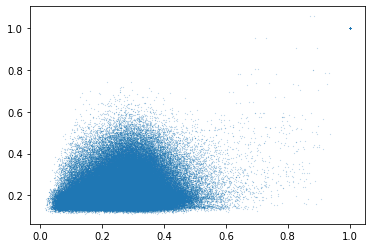

In [24]:
# step 7 plot a scatter graph. using TM Score 1 arbitrarily 
plt.scatter(sorted_tms.loc[:,'TM Score 1'],recip_euc,s=0.01);

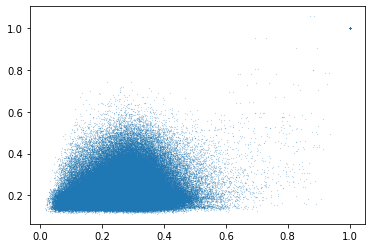

In [25]:
plt.scatter(sorted_tms.loc[:,'TM Score 2'],recip_euc,s=0.01);

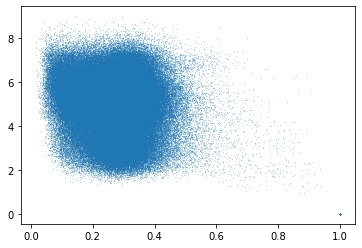

In [60]:
# plotting the unconverted euclidean distances
plt.scatter(sorted_tms.loc[:,'TM Score 1'],sorted_eucs.loc[:,'Euclidean Distance'],s=0.01);

In [26]:
from scipy import stats

In [36]:
x = sorted_tms.loc[:,'TM Score 1'].to_numpy()
y = recip_euc.to_numpy()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [37]:
print("r-squared:", r_value**2)

r-squared: 0.062092133906662156


- So the correlation is pretty shitty if i plot everything, but how about if i just plot data that are above 0.5 TM?

In [65]:
# joining joins on index which i think is screwing things so going to reindex
ni = np.arange(207025)
sorted_eucs.index=ni

In [66]:
sorted_eucs

,File_1,File_2,Euclidean Distance
0,119l,119l,0.000000
1,119l,1aab,3.820197
2,119l,1aaf,5.326700
3,119l,1aba,5.269361
4,119l,1abr,3.816168
...,...,...,...
207020,7icd,5cyt,7.037370
207021,7icd,5fbp,5.110014
207022,7icd,5rub,2.182981
207023,7icd,5znf,5.941117


In [67]:
# joining joins on index which i think is screwing things so going to reindex
ni = np.arange(207025)
sorted_tms.index=ni
sorted_tms

,File_1,File_2,TM Score 1,TM Score 2
0,119l,119l,1.00000,1.00000
1,119l,1aab,0.21867,0.36817
2,119l,1aaf,0.11954,0.23254
3,119l,1aba,0.21126,0.31531
4,119l,1abr,0.26187,0.28770
...,...,...,...,...
207020,7icd,5cyt,0.14674,0.36637
207021,7icd,5fbp,0.21710,0.26388
207022,7icd,5rub,0.26862,0.32895
207023,7icd,5znf,0.05267,0.45144


In [73]:
all_data_df = sorted_eucs.merge(sorted_tms)
all_data_df.columns = ['File_1','File_2','Euclidean_D','TM_1','TM_2']
all_data_df

,File_1,File_2,Euclidean_D,TM_1,TM_2
0,119l,119l,0.000000,1.00000,1.00000
1,119l,1aab,3.820197,0.21867,0.36817
2,119l,1aaf,5.326700,0.11954,0.23254
3,119l,1aba,5.269361,0.21126,0.31531
4,119l,1abr,3.816168,0.26187,0.28770
...,...,...,...,...,...
207020,7icd,5cyt,7.037370,0.14674,0.36637
207021,7icd,5fbp,5.110014,0.21710,0.26388
207022,7icd,5rub,2.182981,0.26862,0.32895
207023,7icd,5znf,5.941117,0.05267,0.45144


In [79]:
# add the column with replaced 0 and 1
all_data_df['Euclidean_D_01_replace'] = all_data_df['Euclidean_D'].replace(0.0,1.0)

In [81]:
# add column with reciprocal 
all_data_df['Euclidean_D_recip'] = 1/all_data_df['Euclidean_D_01_replace']

In [82]:
# mask data for which the tm score 1 is 0.5 or less
tm1_mask = all_data_df[all_data_df.TM_1 > 0.5]
tm1_mask 

,File_1,File_2,Euclidean_D,TM_1,TM_2,Euclidean_D_01_replace,Euclidean_D_recip
0,119l,119l,0.000000,1.00000,1.00000,1.000000,1.000000
456,1aab,1aab,0.000000,1.00000,1.00000,1.000000,1.000000
834,1aab,2bgu,5.516025,0.50616,0.16878,5.516025,0.181290
912,1aaf,1aaf,0.000000,1.00000,1.00000,1.000000,1.000000
1368,1aba,1aba,0.000000,1.00000,1.00000,1.000000,1.000000
...,...,...,...,...,...,...,...
206536,5znf,2reb,5.772948,0.50812,0.09211,5.772948,0.173222
206550,5znf,3chy,5.581752,0.50863,0.15579,5.581752,0.179155
206568,5znf,5znf,0.000000,1.00000,1.00000,1.000000,1.000000
206754,7icd,1idm,3.059509,0.71534,0.84971,3.059509,0.326850


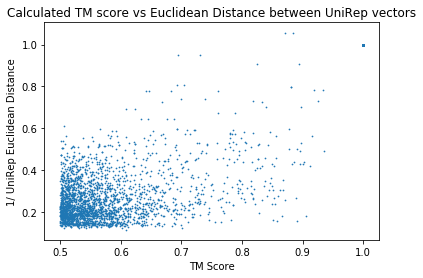

In [93]:
# plot
plt.scatter(tm1_mask.loc[:,'TM_1'],tm1_mask.loc[:,'Euclidean_D_recip'],s=0.5)
plt.title('Calculated TM score vs Euclidean Distance between UniRep vectors')  
plt.xlabel('TM Score')  
plt.ylabel('1/ UniRep Euclidean Distance')  
plt.show();

In [88]:
x = tm1_mask.loc[:,'TM_1'].to_numpy()
y = tm1_mask.loc[:,'Euclidean_D_recip'].to_numpy()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-value:", r_value)
print("r-squared:", r_value**2)

r-value: 0.8955835708273411
r-squared: 0.8020699323358511


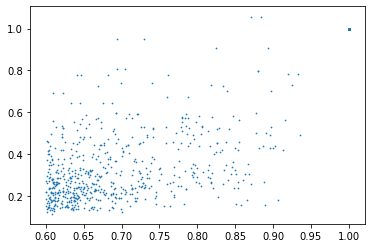

In [120]:
# checking for 0.6 and above
# mask data for which the tm score 1 is 0.5 or less
tm1_mask2 = all_data_df[all_data_df.TM_1 > 0.6]
# plot
plt.scatter(tm1_mask2.loc[:,'TM_1'],tm1_mask2.loc[:,'Euclidean_D_recip'],s=0.5);

In [89]:
x = tm1_mask2.loc[:,'TM_1'].to_numpy()
y = tm1_mask2.loc[:,'Euclidean_D_recip'].to_numpy()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-value:", r_value)
print("r-squared:", r_value**2)

r-value: 0.9209782940021382
r-squared: 0.8482010180230888


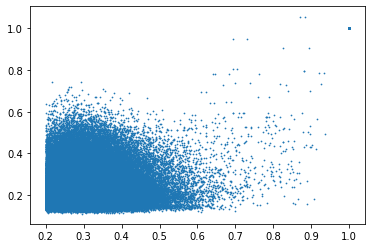

In [91]:
# checking for 0.2 and above
# mask data for which the tm score 1 is 0.5 or less
tm1_mask3 = all_data_df[all_data_df.TM_1 > 0.2]
# plot
plt.scatter(tm1_mask3.loc[:,'TM_1'],tm1_mask3.loc[:,'Euclidean_D_recip'],s=0.5)

In [92]:
x = tm1_mask3.loc[:,'TM_1'].to_numpy()
y = tm1_mask3.loc[:,'Euclidean_D_recip'].to_numpy()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("r-value:", r_value)
print("r-squared:", r_value**2)

r-value: 0.24652172306832904
r-squared: 0.06077295994457791


### Performing a linear regression analysis with TM score 1 and tm data above 0.5

In [94]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

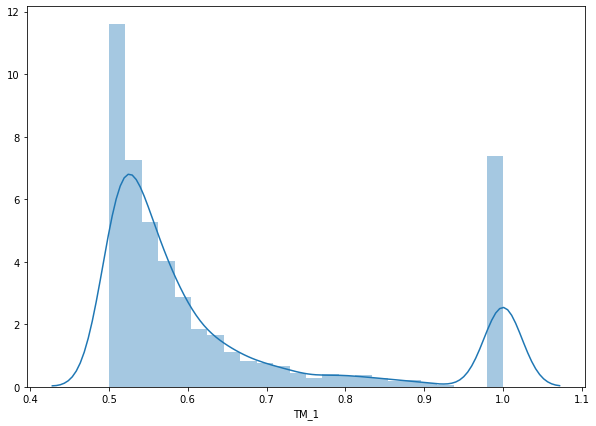

In [126]:
plt.figure(figsize=(10,7))
plt.tight_layout()
seabornInstance.distplot(tm1_mask['TM_1']);

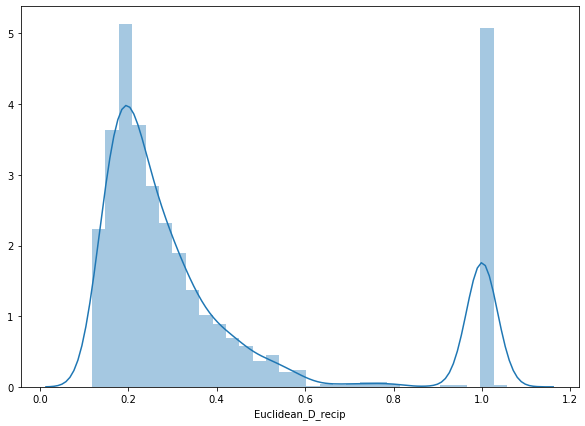

In [127]:
plt.figure(figsize=(10,7))
plt.tight_layout()
seabornInstance.distplot(tm1_mask['Euclidean_D_recip']);

In [166]:
X = tm1_mask['TM_1'].values.reshape(-1,1)
y = tm1_mask['Euclidean_D_recip'].values.reshape(-1,1)

In [167]:
len(X)

2962

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [169]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-0.57510815]
[[1.49069751]]


In [171]:
y_pred = regressor.predict(X_test)

In [172]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.192697,0.246654
1,0.327617,0.221178
2,0.452285,0.603825
3,1.000000,0.915589
4,0.198496,0.227975
...,...,...
588,0.349537,0.196805
589,0.564566,0.183553
590,1.000000,0.915589
591,0.196991,0.289034


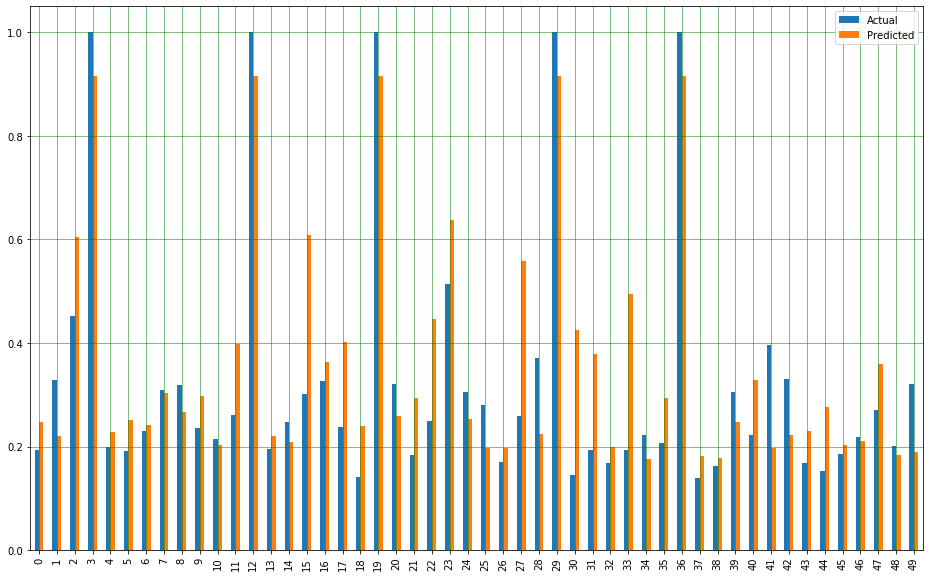

In [173]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

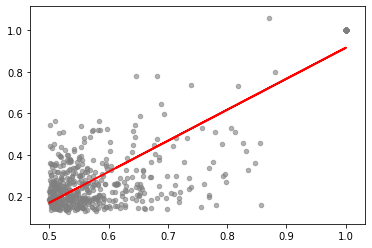

In [174]:
plt.scatter(X_test, y_test,  color='gray', s = 20, alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [175]:
len(df['Actual'])

593

In [ ]:
# i still don't think the above graph is correct. i think i need to sort the dataframe on the actual data
# and then plot predicted 

In [182]:
df_sorted=df.sort_values(by=['Actual'])

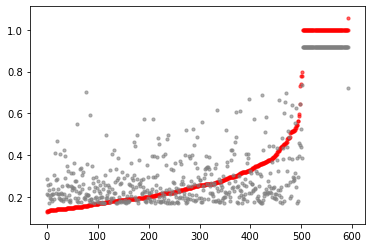

In [184]:
plt.scatter(np.arange(len(df_sorted['Actual'])), df_sorted['Actual'],  color='red', s = 10, alpha=0.6)
plt.scatter(np.arange(len(df_sorted['Predicted'])), df_sorted['Predicted'],  color='gray', s = 10, alpha=0.6);

In [137]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09642747238910239
Mean Squared Error: 0.015730064978720256
Root Mean Squared Error: 0.12541955580658168


In [138]:
print('And then Mean TM Score was:',np.mean(X))

And then Mean TM Score was: 0.6404876333558407


In [146]:
0.1254/0.6405

0.19578454332552697

so the RMSE is greater than 10% of the mean, so this is quite an innacurate model. 

## Repeating the regression with the 0.6 cut-off:

In [139]:
X = tm1_mask2['TM_1'].values.reshape(-1,1)
y = tm1_mask2['Euclidean_D_recip'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [140]:
len(X)

1075

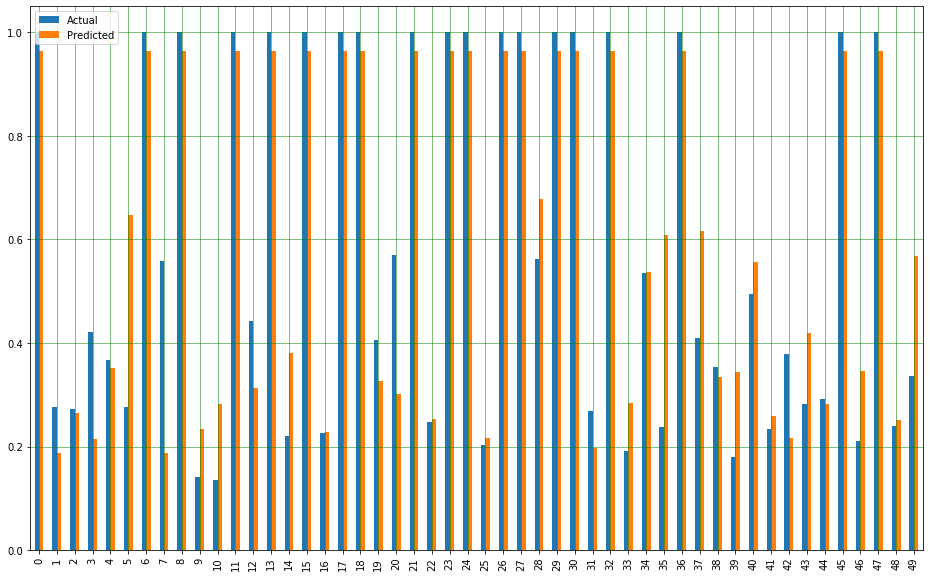

In [141]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

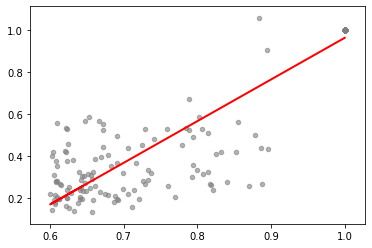

In [142]:
plt.scatter(X_test, y_test,  color='gray', s = 20, alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [143]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09018844104294248
Mean Squared Error: 0.017373615026055188
Root Mean Squared Error: 0.13180900965432973


In [144]:
print('And then Mean TM Score was:',np.mean(X))

And then Mean TM Score was: 0.8227749209302326


In [145]:
0.1318/0.8228

0.16018473505104522